# Fourier Analysis

Fourier analysis, or the approximation of functions as series of sine and cosine functions, can be a very useful tool in the numerical analysis of data as well as in the numerical solution of differential equations. When analyzing experiments, Fourier transforms are frequently used. 

* Optical tweezers are often characterised by the frequency spectrum of position fluctuations.
* Lock-in detection works by Fourier analysis for a very specific frequency of signals.
* Optics can be understood with the help of Fourier transforms.

There are a number of other areas where Fourier transforms and analysis are important. We will take a brief look at Fourier series and Fourier transforms from a mathematical point of view. We will apply them to analyse the frequency spectrum of the oscillations of our coupled pendulum. We will come back to this later when we simulate the motion of a Gaussian wave packet for quantum mechanics.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

# center the plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Fourier series
A Fourier series is a representation of periodic function $f(t)$ of period $2\pi$ or more general as described below on an arbitrary interval $T$ regarding sine and cosine functions

\begin{equation} \label{eq:fourier_sum}
f(t)=\frac{A_{0}}{2}+\sum_{k=1}^{\infty}\left ( A_{k}\cos\left (\omega_k t\right) + B_{k}\sin\left (\omega_k t\right)\right )
\end{equation}

where $\omega_k=\frac{2\pi k}{T}$.  $T$ represents the period of the cosine and sine functions. Their amplitude is defined by the coefficients $A_k$ and $B_k$. The term $A_0$ is a constant offset added to the oscillating sine and consine functions. Equation \ref{eq:fourier_sum} therefore represents an arbitrary periodic function $f(t)$ on an interval T as a sum of oscillating sine and cosine functions of discrete frequencies ($\omega_k$)
 
\begin{equation*}
\omega_k= 0, \frac{2\pi}{T}, \frac{4\pi}{T}, \frac{6\pi}{T}, ... , \frac{n\pi}{T}
\end{equation*}

and varying amplitudes. The cosine and sine functions in the sum (Eq.  \ref{eq:fourier_sum}) can be shown to be orthogonal by using the trigonometric identity 

\begin{equation}
\sin(\omega_{i} t)\sin(\omega_{k}t )=\frac{1}{2}\lbrace\cos((\omega_{i}-\omega_{k})t)- \cos((\omega_{i}+\omega_{k})t\rbrace
\end{equation}

Therefore the integral 

\begin{equation}
\int\limits_{-\frac{T}{2}}^{+\frac{T}{2}}  \sin(\omega_{i}t)\sin (\omega_k t) dt	
\end{equation}

can be split into two integrals over a cosine function with the sum $(\omega_{1}+\omega_{2})$ and the difference frequency $(\omega_{1}-\omega_{2})$. As the integration results in a sine function and has to be evaluated at $T/2$ and $-T/2$ with $\omega_k=k 2\pi/T$, $(k \in \mathbb{Z}^+ )$, the integral results in 

\begin{equation}\label{eq:orthog}
\int\limits_{-\frac{T}{2}}^{+\frac{T}{2}}  \sin(\omega_{i}t)\sin (\omega_k t) dt  =\begin{cases}
0 &\text{for }  i\neq k, \\
T &\text{for }  i=k
\end{cases}
\end{equation}

Equivalently, the same can be carried out for the cosine functions, which yields

\begin{equation}
\int\limits_{-\frac{T}{2}}^{+\frac{T}{2}}  \cos(\omega_{i}t)\cos (\omega_k t) dt  =\begin{cases}
0 &\text{for }  i\neq k, \\
T &\text{for }  i=k
\end{cases} 
\end{equation}

As mentioned above the coefficients $A_k$ and $B_k$ are determined by the projections of the function $f(t)$ onto the basis functions as displayed in Eq.\ref{A_k}-\ref{B_k}. 


\begin{align}\label{Projections}
\int\limits_{-\frac{T}{2}}^{+\frac{T}{2}} & \cos (\omega_k t) dt  =\begin{cases}
0 &\text{for }  k\neq0, \\
T &\text{for }  k=0
\end{cases} \\
\int\limits_{-\frac{T}{2}}^{+\frac{T}{2}} & \sin(\omega_k t) dt=0  \text{ for all }k 
\end{align}

\begin{equation}\label{A_k}
A_k=\frac{2}{T}\int\limits_{-\frac{T}{2}}^{+\frac{T}{2}} f(t)\cos(\omega_k t) dt  \text{ for } k \neq 0
\end{equation}

and for $k=0$

\begin{equation}\label{A_0}
A_0= \frac{1}{T}\int\limits_{-\frac{T}{2}}^{+\frac{T}{2}} f(t) dt
\end{equation}

In this case $\frac{2}{T}$ and $\frac{1}{T}$ are the mean values for the Equations. To get the coefficient $B_k$ I need to multiply $f(t)$ with $\sin (\omega_k t)$ and integrate it from $-\frac{T}{2}$ to $+\frac{T}{2}$. 

As a result of this, we obtain 

\begin{equation}\label{B_k}
B_k=\frac{2}{T}\int\limits_{-\frac{T}{2}}^{+\frac{T}{2}} f(t) \sin(\omega_k t) dt,\,  \forall k
\end{equation}



## Fourier transform

The Fourier transform is a generalisation of the complex Fourier series to the representation of arbitrary non-periodic functions $f(t)$ by a continuous spectrum of complex functions $\exp(i\omega t)$. This transform is therefore also called continuous Fourier transform. The sum of individual sine and cosine functions with discrete frequencies $\omega_{k}$ in the Fourier series is now replaced by an integral over the complex function $\exp(i\omega t)$ with arbitrary continuous values of the frequency $\omega$. 


The Fourier transform of the function $f(t)$ is therefore defined by 

\begin{equation}
F(\omega)=\int\limits_{-\infty}^{+\infty}f(t)e^{-i\omega t}dt
\end{equation}

with $F(\omega)$ now representing the spectrum of frequencies contributing to the function $f(t)$. Similarly, the so called inverse Fourier transform of the spectrum $F(\omega)$ yields the original function $f(t)$ again (Eq. \ref{eq:inverse_FT}). 

\begin{equation}\label{eq:inverse_FT}
f(t)=\frac{1}{2\pi}\int\limits_{-\infty}^{+\infty}F(\omega)e^{+i\omega t}dt
\end{equation}

Note that the Fourier transform $F(\omega)$ is a complex number, which gives you information on the phase and amplitude of the oscillations. Not all of the oscillations have to align in with the same phase. As compared to the last lecture, we may get the phase of the oscillation at a frequency $\omega$ by

\begin{equation}
\phi=\tan^{-1}\left(\frac{Im(F(\omega))}{Re(F(\omega))}\right)
\end{equation}

and the amplitude at a frequency $\omega$ by

\begin{equation}
x_{0}^{\rm theo}=|F(\omega)|
\end{equation}

There are a number of efficient numerical algorithms available, which simplify the Fourier transformation. These are called *Fast Fourier Transforms* and implemented in *numpy* for example. We will use these algorithms to calculate the numerical Fourier transforms of our signals to identify the different oscillations in our signal. 
Below is an example how the numpy function cab be used and how to obtain the proper frequency axis.

~~~
f=np.fft.fft(alpha)
freq = np.fft.fftfreq(t.shape[-1],time/t.shape[-1])
~~~



## Frequency analysis of our coupled pendula

To use the Fourier analysis we load the data of our previous simulation with the normal modes and the beat mode of the harmonic oscillator.

In [2]:
nm1=np.loadtxt('nm1.txt',delimiter=',')
nm2=np.loadtxt('nm2.txt',delimiter=',')
beats=np.loadtxt('beats.txt',delimiter=',')

The follwing code extracts the data and sorts them into individual arrays for eaysier plotting.

In [3]:
t=nm1[:,0]
theta1_nm1=nm1[:,1]
theta1_nm2=nm2[:,1]
theta1_beats=beats[:,1]

The next few lines are mainly for plotting the data but contain also the Fourier transform of the signal.

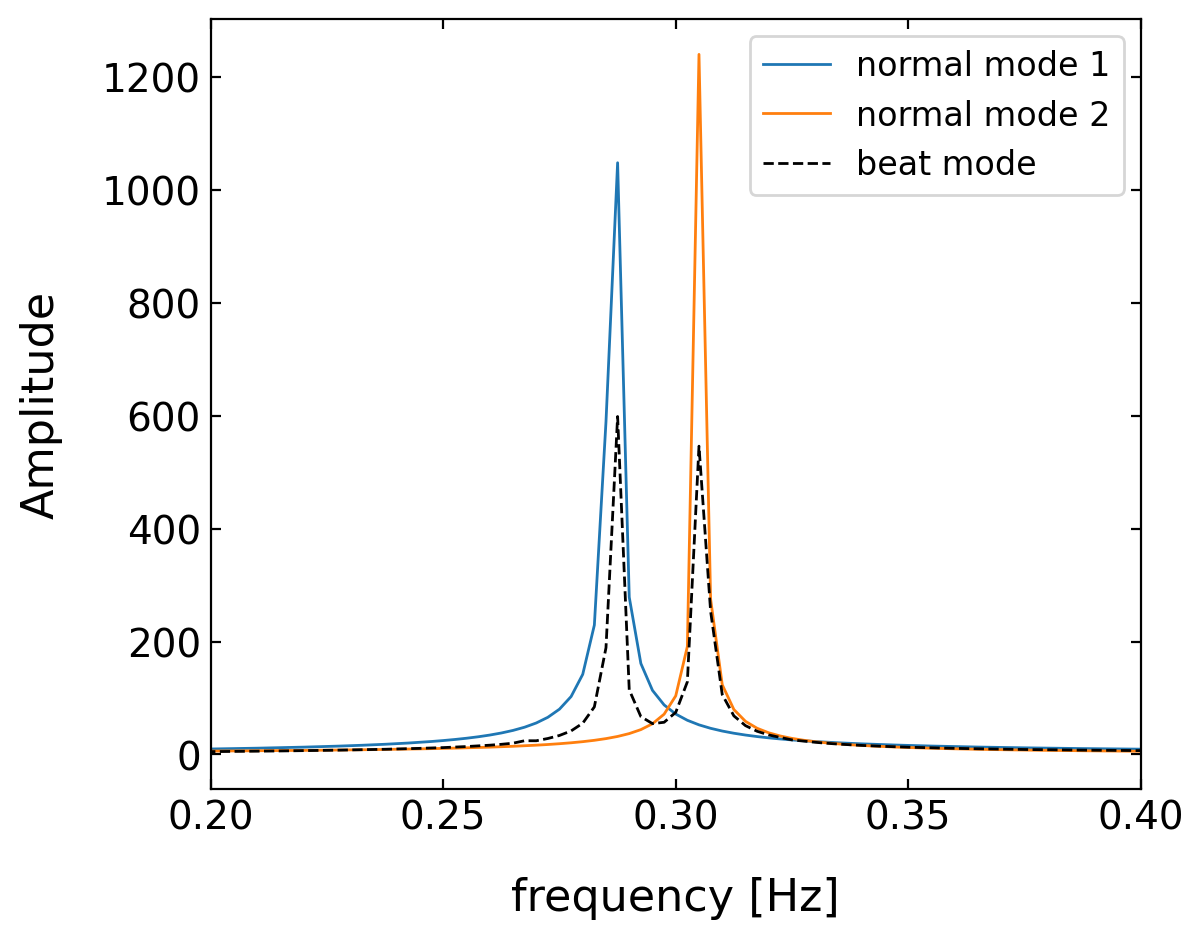

In [4]:
# calculate the frequency spectrum of the oscillations for different initial conditions
plt.figure(1,figsize=(6,5))
plt.xlabel('frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude',fontsize=16)
plt.tick_params(labelsize=14)
ft1=np.fft.fft(theta1_nm1)
freq = np.fft.fftfreq(t.shape[-1],t[-1]/t.shape[-1])
plt.plot(freq[:1000],np.abs(ft1)[:1000],label='normal mode 1')

ft1=np.fft.fft(theta1_nm2)
freq = np.fft.fftfreq(t.shape[-1],t[-1]/t.shape[-1])
plt.plot(freq[:1000],np.abs(ft1)[:1000],label='normal mode 2')

ft1=np.fft.fft(theta1_beats)
freq = np.fft.fftfreq(t.shape[-1],t[-1]/t.shape[-1])
plt.plot(freq[:1000],np.abs(ft1)[:1000],'k--',lw=1,label='beat mode')

plt.legend()
plt.xlim(0.2,0.4)
plt.show()

The result of our calculation is now, that the beat mode is actually a superposition of the two normal modes of the system. In fact, it turns out, that all of the possible states of a coupled oscillator system can be constructed from a superposition of its normal modes with specific amplitudes.